Hoja de trabajo

Integrantes: 

Roberto Ríos
Javier Valle 20159

In [37]:
# Imports necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz

# Ejercicio 1

### Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior.

Precisión: 0.2831050228310502


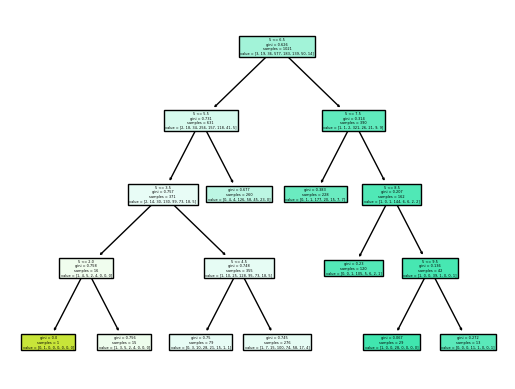

In [67]:
# Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior.
df = pd.read_csv('train.csv') # Datos.

# # Imprimiendo la columna de preios y de condición.
# df["SalePrice"]
# df["OverallCond"]
# df["OverallQual"]
# Imprimiendo columnas numéricas.


x = df["OverallCond"]
y = df["OverallQual"]

# Imprimiendo las columnas numéricas.
#print(df.select_dtypes(include=['int', 'float']))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

# print("X_train", X_train)
# print("X_test", X_test)
# print("y_train", y_train)
# print("y_test", y_test)

# Haciendo reshape.
calidad = y_train.values.reshape(-1, 1)
condicion = X_train.values.reshape(-1, 1)

calidad_t = y_test.values.reshape(-1, 1)
condicion_t = X_test.values.reshape(-1, 1)


# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(calidad, condicion)

tree.plot_tree(clf, feature_names=df["OverallCond"], filled=True)

# Predecir los resultados con los datos de prueba
y_pred = clf.predict(condicion_t)

# Evaluar la precisión del modelo
accuracy = accuracy_score(calidad_t, y_pred)
print("Precisión:", accuracy)

# Ejercicio 2

### Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables.

In [125]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=2)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p2")

Precisión: 0.860566561314821


'Árbol_p2.pdf'

# Ejercicio 3

### Úselo para predecir y analice el resultado. ¿Qué tal lo hizo?

In [129]:
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 5 de profundidad: ", y_pred)

#  Imprimiendo el resultado de manera más visible.
print("Predicción con 5 de profundidad: ", y_pred[0:10])


Predicción con 5 de profundidad:  [208500.  181800.  223500.  ... 266750.  141937.5 147500. ]
Predicción con 5 de profundidad:  [208500.         181800.         223500.         140002.17391304
 249966.66666667 142995.72727273 307000.         199980.
 129973.33333333 117875.        ]


# Ejercicio 4

### Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?

In [141]:
# Cambiando la profundiad a 3 (o sea dos profundidades menos que la primera predicción)

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=3)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p3")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 3 de profundidad: ", y_pred)



# Profundidad 3
datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=4)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p4")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 4 de profundidad: ", y_pred)




# Profundidad de 7.

datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=7)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p7")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 7 de profundidad: ", y_pred)

# Profundidad de 9.
datos = pd.read_csv('train.csv')


# Obteniendo las variables numéricas en una matriz.
X = datos.select_dtypes(include=['int', 'float']).values

#X

# Reemplazando los NaN por ceros.
X = np.nan_to_num(X)

X

# Variable a predecir.
y = datos["SalePrice"].values

# Quitando los NaN de y.
#y = y[~np.isnan(y)]

y = np.nan_to_num(y)

# Creando el árbol.
arbol = DecisionTreeRegressor(max_depth=9)

# Ajustando el árbol.
arbol.fit(X, y)

#arbol

# Prediciendo los valores.

score = arbol.score(X, y)

print("Precisión:", score)

dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=datos.select_dtypes(include=['int', 'float']).columns,
    class_names=["SalePrice"],
    filled=True,
    rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("Árbol_p9")


# Haciendo los cálculos.
# Prediciendo el precio con el árbol de decisión.

y = datos.select_dtypes(include=[np.number])

y

# Convirtiendo los NaN a número.
y = np.nan_to_num(y)

# Prediciendo el precio.
y_pred = arbol.predict(y)

print("Predicción con 9 de profundidad: ", y_pred)

Precisión: 0.9615272566170009
Predicción con 3 de profundidad:  [199438.32701422 167124.68474576 246177.64736842 ... 246177.64736842
 132950.15550239 132950.15550239]
Precisión: 0.9904078927691186
Predicción con 4 de profundidad:  [211119.66666667 175131.77922078 232856.20952381 ... 262633.54117647
 140973.84       140973.84      ]
Precisión: 0.9998834255463563
Predicción con 7 de profundidad:  [209533.33333333 181616.71428571 222227.27272727 ... 265450.7
 142705.33333333 147360.        ]
Precisión: 0.9999972270675259
Predicción con 9 de profundidad:  [208500.  181800.  223500.  ... 266750.  141937.5 147500. ]


# Ejercicio 5

### Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo mejor?

0.722645916252243


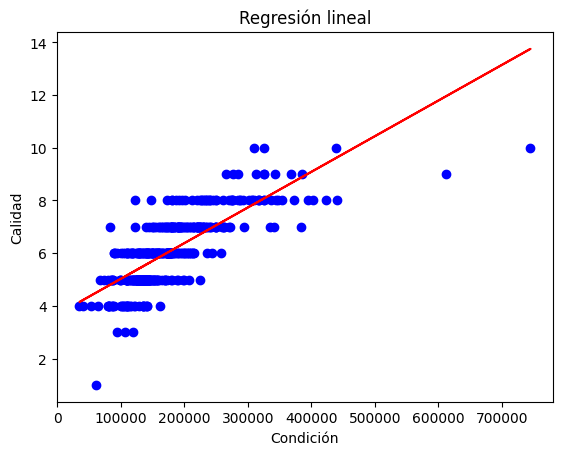

In [142]:
# Haciendo regresión lineal.

df = pd.read_csv('train.csv') # Datos.

# # Imprimiendo la columna de preios y de condición.
# df["SalePrice"]
# df["OverallCond"]
# df["OverallQual"]
# Imprimiendo columnas numéricas.


x = df["SalePrice"]
y = df["OverallQual"]

# Imprimiendo las columnas numéricas.
#print(df.select_dtypes(include=['int', 'float']))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

# print("X_train", X_train)
# print("X_test", X_test)
# print("y_train", y_train)
# print("y_test", y_test)

# Haciendo reshape.
calidad = y_train.values.reshape(-1, 1)
condicion = X_train.values.reshape(-1, 1)

calidad_t = y_test.values.reshape(-1, 1)
condicion_t = X_test.values.reshape(-1, 1)

modelo = LinearRegression()

modelo.fit(condicion_t, calidad_t)

# Hacer una predicción de prueba.
y_pred = modelo.predict(condicion_t)

# Calculando el error cuadrático medio.
mse = mean_squared_error(calidad_t, y_pred)

print(mse)

# Graficando los datos.

# Train.
plt.scatter(condicion_t, calidad_t, color='blue')

plt.plot(condicion_t, y_pred, color='red')

# Datos de la gráfica.
plt.title("Regresión lineal")
plt.xlabel("Condición")
plt.ylabel("Calidad")

plt.show()

# Inciso 6

### Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases deben tener un fundamento en la distribución de los datos de precios, y estar bien explicados.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Precio, dtype: float64
Precio:  0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Precio, Length: 1460, dtype: int64
Clasificación:  0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64


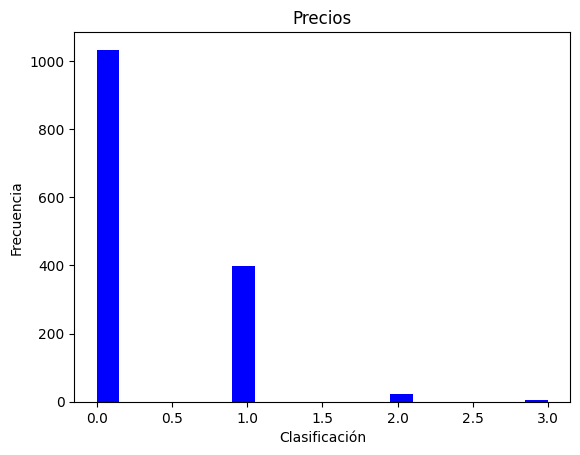

In [123]:
# Clasificando las casas como económicas, intermedias o caras.

# Creando la columna de precios.
df["Precio"] = df["SalePrice"]

# Cambiando los NaN por ceros.
df["Precio"] = df["Precio"].fillna(0)

#print(df["Precio"])

# Ordenando los precios.
df["Precio"].sort_values()

# Viendo los intervalos de precios.
print(df["Precio"].describe())

# Definiendo los intervalos.
intervalos = [200000, 400000, 600000, 800000, df["Precio"].max()]

intervalos = sorted(intervalos) # Ordenando los invervalos.

# Definiendo las etiquetas.
etiquetas = ["Barato", "Intermedio", "Caro"]


# Ordenando los precios en base a las etiquetas.
df["Precio"].sort_values(ascending=True)

clasificacion = np.digitize(df['Precio'], bins=intervalos, right=True)

#print("Clasificación: ", clasificacion)

# Agregando la clasificación al df.

df["Clasificacion"] = clasificacion

df.to_csv("archivo_clasificado.csv", index=False)

print("Precio: ", df["Precio"])
print("Clasificación: ", df["Clasificacion"])

# Visualizando los precios y la clasificación.

# Gráfica de precios.
plt.hist(df["Clasificacion"], bins=20, color="blue")

plt.title("Precios")
plt.xlabel("Clasificación")
plt.ylabel("Frecuencia")

plt.show()